#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

   Age  Income  Purchase
0   76   75071         1
1   88   62405         0
2   82   61914         1
3   81   66843         1
4   62   30492         0


Text(0.5, 1.0, 'Income Data After Outliers Removed (Z-Score)')

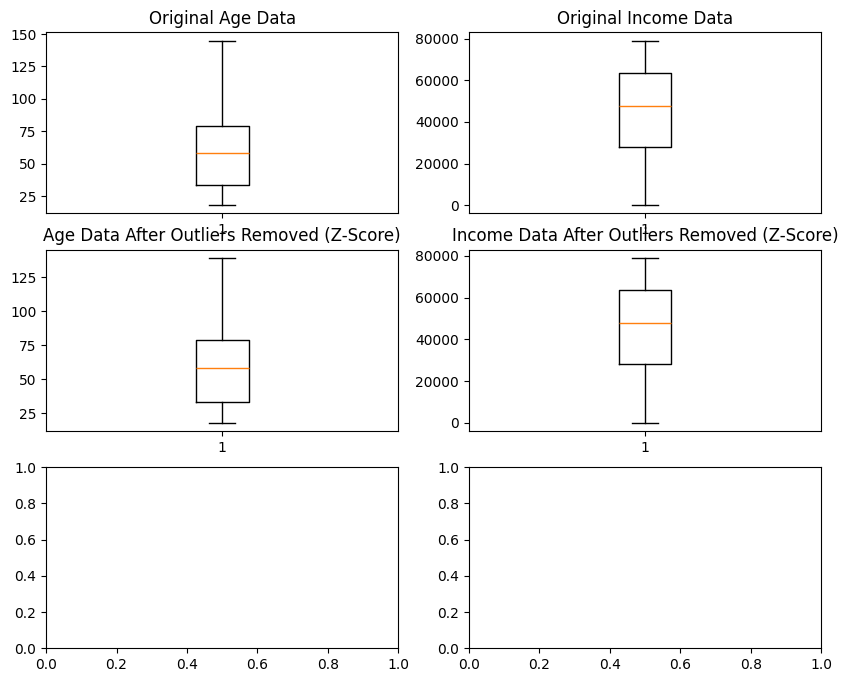

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

data = pd.read_csv('/workspaces/707-lecture-master/3-week3/data/sample_data_with_outliers.csv')
print(data.head())

original_df = data.copy()
zscored_age_df = data.copy()
zscored_income_df = data.copy()

#detecting outliers with z-score method
zscored_age_df['age_z_score'] = zscore(zscored_age_df['Age'])
age_outliers_z_score = zscored_age_df[np.abs(zscored_age_df['age_z_score']) > 3]

zscored_income_df['income_z_score'] = zscore(zscored_income_df['Income'])
income_outliers_z_score = zscored_income_df[np.abs(zscored_income_df['income_z_score']) > 3]


#Removing Outliers
age_df_no_outliers_z = zscored_age_df[np.abs(zscored_age_df['age_z_score']) <= 3]
income_df_no_outliers_z = zscored_income_df[np.abs(zscored_income_df['income_z_score']) <= 3]



fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0,0].boxplot(original_df['Age'])
axs[0,0].set_title('Original Age Data')

axs[0,1].boxplot(original_df['Income'])
axs[0,1].set_title('Original Income Data')

axs[1,0].boxplot(age_df_no_outliers_z['Age'])
axs[1,0].set_title('Age Data After Outliers Removed (Z-Score)')

axs[1,1].boxplot(income_df_no_outliers_z['Income'])
axs[1,1].set_title('Income Data After Outliers Removed (Z-Score)')

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


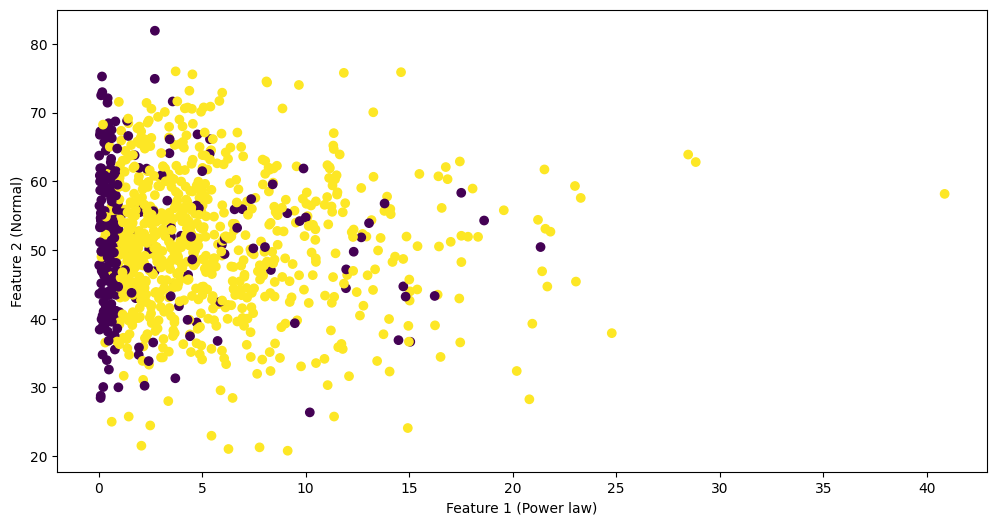

Logistic Regression with StandardScaling - Test Accuracy: 0.72
Logistic Regression with StandardScaling - Test Accuracy: 0.92


In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()

#Scaling with StandardScaler
scaler = StandardScaler()
standard_scaled_train_data = scaler.fit_transform(X_train)
standard_scaled_test_data = scaler.fit_transform(X_test)

#Logistic Regression with Standard Scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(standard_scaled_train_data, y_train)
print(f"Logistic Regression with StandardScaling - Test Accuracy: {lr.score(standard_scaled_test_data, y_test):.2f}")

#Scaling with log transform
log_train_data = np.log1p(X_train)
log_test_data = np.log1p(X_test)

#Logistic Regression with Standard Scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(log_train_data, y_train)
print(f"Logistic Regression with StandardScaling - Test Accuracy: {lr.score(log_test_data, y_test):.2f}")




#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [30]:
from sklearn.calibration import LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


titanic = pd.read_csv('../2-week2/data/titanic.csv')

important_features = ['pclass','sex','age','survived']
pred_features = ['pclass','sex','age']
titanic_reduced = titanic[important_features]
le1 = LabelEncoder()
titanic_reduced['sex'] = le1.fit_transform(titanic_reduced['sex'])

ffill_titanic = titanic_reduced.copy()
ffill_titanic['age'].fillna(method = 'ffill', inplace = True)
dt_clf_1 = DecisionTreeClassifier()
cv_results_1 = cross_val_score(dt_clf_1,X=ffill_titanic[pred_features],y=ffill_titanic['survived'],cv=5, scoring = 'f1')
print('ffill imputation results (f1 score): ',cv_results_1.mean())

mn_titanic = titanic_reduced.copy()
mn = SimpleImputer(strategy='mean')
mn_titanic['age'] = mn.fit_transform(mn_titanic[['age']])
cv_results_2 = cross_val_score(dt_clf_1,X=mn_titanic[pred_features],y=mn_titanic['survived'],cv=5, scoring = 'f1')
print('Simple Imputer mean results (f1 score): ',cv_results_2.mean())

mf_titanic = titanic_reduced.copy()
mf = SimpleImputer(strategy='most_frequent')
mf_titanic['age'] = mf.fit_transform(mf_titanic[['age']])
cv_results_3 = cross_val_score(dt_clf_1,X=mf_titanic[pred_features],y=mf_titanic['survived'],cv=5, scoring = 'f1')
print('Simple Imputer Most Frequent results (f1 score): ',cv_results_3.mean())

knn_titanic = titanic_reduced.copy()
knn = KNNImputer()
knn_titanic['age'] = knn.fit_transform(knn_titanic[['age']])
cv_results_4 = cross_val_score(dt_clf_1,X=knn_titanic[pred_features],y=knn_titanic['survived'],cv=5, scoring = 'f1')
print('KNN Imputer results (f1 score): ',cv_results_4.mean())



ffill imputation results (f1 score):  0.5009680124314058
Simple Imputer mean results (f1 score):  0.4649056364534137
Simple Imputer Most Frequent results (f1 score):  0.4631221534914841
KNN Imputer results (f1 score):  0.4649056364534137


/tmp/ipykernel_19720/342498169.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_reduced['sex'] = le1.fit_transform(titanic_reduced['sex'])
/tmp/ipykernel_19720/342498169.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_titanic['age'].fillna(method = 'ffill', inplace = True)


#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

#sample_encoded = pd.get_dummies(sample, columns=['color', 'target'])
#print(sample_encoded)


tx = make_column_transformer((OneHotEncoder(sparse = False),['color','target']))
result = tx.fit_transform(sample)
df = pd.DataFrame(result, columns=tx.get_feature_names_out())
df['yumminess'] = sample.yumminess
df

   yumminess  color_blue  color_green  color_red  target_apple  target_grass  \
0         10       False        False       True          True         False   
1          2        True        False      False         False         False   
2          3       False         True      False         False          True   
3          1       False        False       True         False         False   
4          6        True        False      False         False         False   
5          9       False         True      False          True         False   

   target_moon  target_sky  
0        False       False  
1        False        True  
2        False       False  
3        False        True  
4         True       False  
5        False       False  


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,onehotencoder__color_blue,onehotencoder__color_green,onehotencoder__color_red,onehotencoder__target_apple,onehotencoder__target_grass,onehotencoder__target_moon,onehotencoder__target_sky,yumminess
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,10
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.